# Работа с данными по аниме-фильмам и сериалам

У этого проекта нет какой-то конкретной цели. Была выбрана тема и мы, обладая определённым арсеналом инструментов, пытались выудить из неё хоть что-нибудь. В итоге вышла вот такая вот страничка. Заранее благодарю за внимание.

Касательно критериев (признаюсь честно, соблюдены были не все):
1. Базовые возможности (циклы, условия, словари и списки) - всё в наличии.
2. Структура есть.
3. Из продвинутых возможностей использовались обработка исключений и работа с файлами.
4. Обработка данных с помощью pandas - осуществлялась.
5. Веб-скреппинг с помощью BeautifulSoup - есть.
6. Работа с API - done.
7. Для визуализации использовались библиотеки matplotlib.pyplot и seaborn.
8. JavaScript отсутствует. Было сложно его куда-то вставить и в конце концов и не получилось.
До идеала нам очень и очень далеко, но подобная попытка создания проекта лишней уж точно не будет.

Начнём с того, что подгрузим все необходимые библиотеки:

In [222]:
import pandas as pd
from collections import Counter 
from collections import OrderedDict
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import wikipedia
import random

# Этап 1. Подготовка данных. Обработка csv-файла с помощью pandas

Скачаем соответствующий набор данных с Kaggle. 
Найти его можно по ссылке: https://www.kaggle.com/CooperUnion/anime-recommendations-database

In [99]:
anime = pd.read_csv('anime.csv')
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


Отсечём слабопросматриваемые и низкорейтинговые тайтлы, посмотрим, что нам могут дать работы с рейтингом выше 7 баллов, просмотренные более чем 5000 человек. Заодно заменим 'Unknown' в столбце 'episodes' на числовое значение (0), чтобы определить, коррелирует ли столбец 'episodes' с каким-либо ещё.   

In [4]:
new = anime[anime['rating'] >= 7.0]
an = new[anime['members'] >= 5000]
an.loc[an['episodes'] == 'Unknown', 'episodes'] = 0
an[an['episodes'] == 0]
an['episodes'] = pd.to_numeric(an['episodes'])
an

C:\Users\feygi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\feygi\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\feygi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


# Этап 2. Посмотрим на данные

Теперь, когда у нас есть таблица в том виде, в котором мы хотели бы её видеть, займёмся поиском всяких закономерностей, паттернов, построением всяких красивых графиков, чтобы данные стали нагляднее. 
Начнём с корреляции. Особых взаимосвязей нет, но определённая зависимость между рейтингом и числом просмотревших наблюдается.

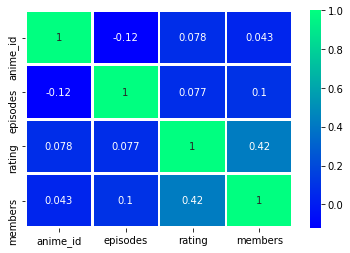

In [102]:
sns.heatmap(an.corr(), annot = True, cmap='winter',linewidths=1.9)

Рассмотрим эту зависимость чуть ближе. А ещё посмотрим, какую роль во всём этом играет тип аниме. Так, наиболее просматриваемыми являются именно сериалы, дальше идут фильмы, а вот остальные работы как смотрят, так и высоко оценивают не столь многие зрители.

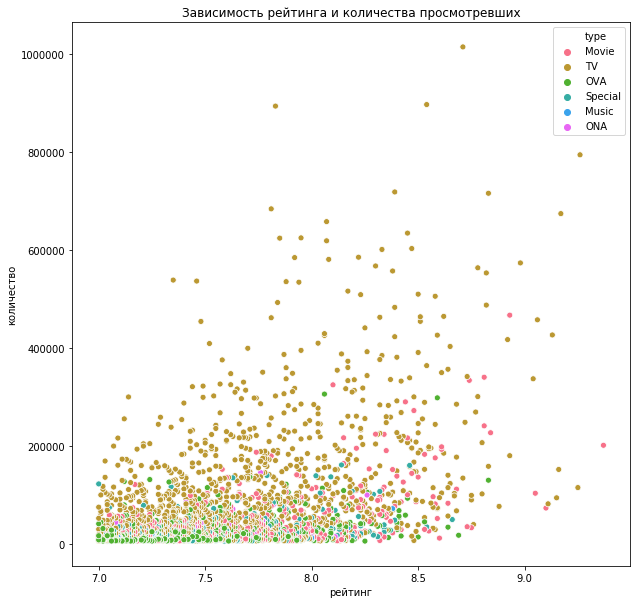

In [110]:
plt.figure(figsize=(10,10))
sns.scatterplot('rating', 'members', hue = 'type', data = an, palette = 'husl')
plt.title('Зависимость рейтинга и количества просмотревших')
plt.xlabel('рейтинг')
plt.ylabel('количество')
plt.show()

Можно взглянуть и на то, какие баллы чаще всего ставят картинам зрители. Пользователи не особо щедры на баллы от 8 и выше. 

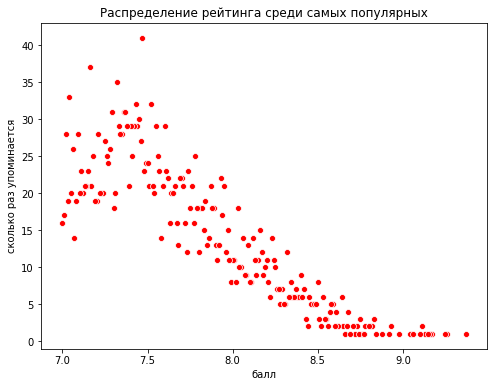

In [189]:
a = an['rating'].value_counts()
y = a.index.values
plt.figure(figsize=(8,6))
sns.scatterplot(y, a, data = an, color = 'red')
plt.title('Распределение рейтинга среди самых популярных')
plt.xlabel('балл')
plt.ylabel('сколько раз упоминается')
plt.show()

Для столбиковых диаграмм вообще создадим единую функцию и отобразим их все одновременно. Рассмотрим топ-15 аниме по количеству просмотревших, по количеству эпизодов и по рейтингу. Кроме того, добавим к ним рейтинг в зависимости от типа, а также количество просмотревших в зависимости от типа. 

К этим графикам можно добавить и множество других, показывающих разнообразные зависимости.

In [133]:
mem = an.groupby('name')['members'].mean().sort_values(ascending=False).head(15)
num_of_ep = an.groupby('name')['episodes'].mean().sort_values(ascending=False).head(15)
rate = an.groupby('name')['rating'].mean().sort_values(ascending=False).dropna().head(15)
type1 = an.groupby('type')['rating'].max().sort_values(ascending=False).dropna()
type1_mean = an.groupby('type')['rating'].mean().sort_values(ascending=False).dropna()
type2 = an.groupby('type')['members'].max().sort_values(ascending=False).dropna()

s_graph = [mem, num_of_ep, rate, type1, type1_mean, type2]

In [134]:
def bar(graph):
    fin = []
    for gr in graph:
        plt.figure(figsize = (5, 5))
        g = sns.barplot(x = gr, y = gr.index.values, palette = 'husl')
        fin.append(g)
    return fin

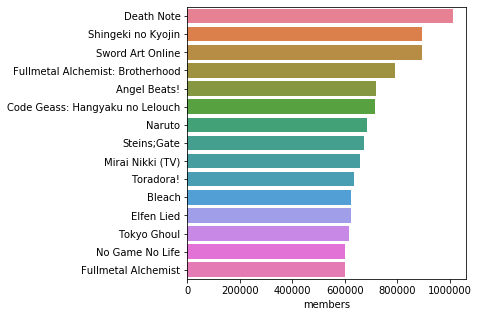

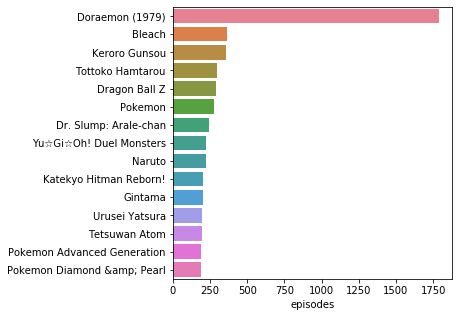

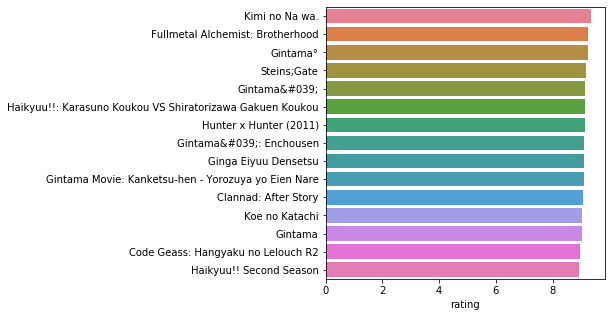

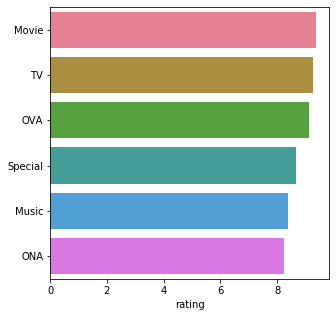

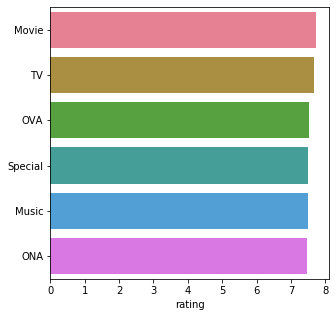

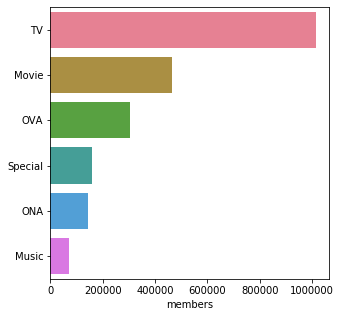

In [135]:
bar(s_graph)

А вот с жанрами не всё так просто, для того, чтобы посчитать наиболее часто встречающиеся, сначала необходимо превратить некоторые значения столбца 'genre' из сплошных строк, внутри которых заключено несколько жанров, в отдельные единицы. То есть сделать из строк списки. 
Затем мы избавимся от лишних пробелов перед словами и после них и, наконец, создадим отсортированный словарь, в котором ключом будет жанр, а значением - число его вхождений в нашу таблицу.

In [30]:
def genre_finder(gen):
    gen = gen.dropna()
    gen = list(gen)
    spis = []
    for item in gen:
        i = item.split(',')
        for k in i:
            new = k.strip()
            spis.append(new)
            new = sorted(spis)
            an = Counter(new)
    return dict(OrderedDict(sorted(an.items(), key=lambda t: t[1])))

In [31]:
genre_finder(an['genre'])

{'Yuri': 2,
 'Yaoi': 9,
 'Dementia': 14,
 'Cars': 15,
 'Shoujo Ai': 28,
 'Shounen Ai': 31,
 'Josei': 35,
 'Samurai': 51,
 'Kids': 54,
 'Thriller': 56,
 'Vampire': 56,
 'Game': 62,
 'Hentai': 63,
 'Police': 84,
 'Martial Arts': 88,
 'Demons': 102,
 'Parody': 112,
 'Horror': 114,
 'Music': 116,
 'Space': 125,
 'Psychological': 129,
 'Sports': 147,
 'Harem': 154,
 'Historical': 176,
 'Ecchi': 190,
 'Military': 194,
 'Shoujo': 203,
 'Super Power': 203,
 'Seinen': 237,
 'Magic': 250,
 'Mecha': 252,
 'Mystery': 269,
 'Slice of Life': 383,
 'Supernatural': 496,
 'School': 522,
 'Adventure': 597,
 'Sci-Fi': 607,
 'Fantasy': 631,
 'Romance': 664,
 'Shounen': 716,
 'Drama': 734,
 'Action': 995,
 'Comedy': 1325}

Совершив эту незамысловатую операцию, мы можем превратить полученные данные в график.

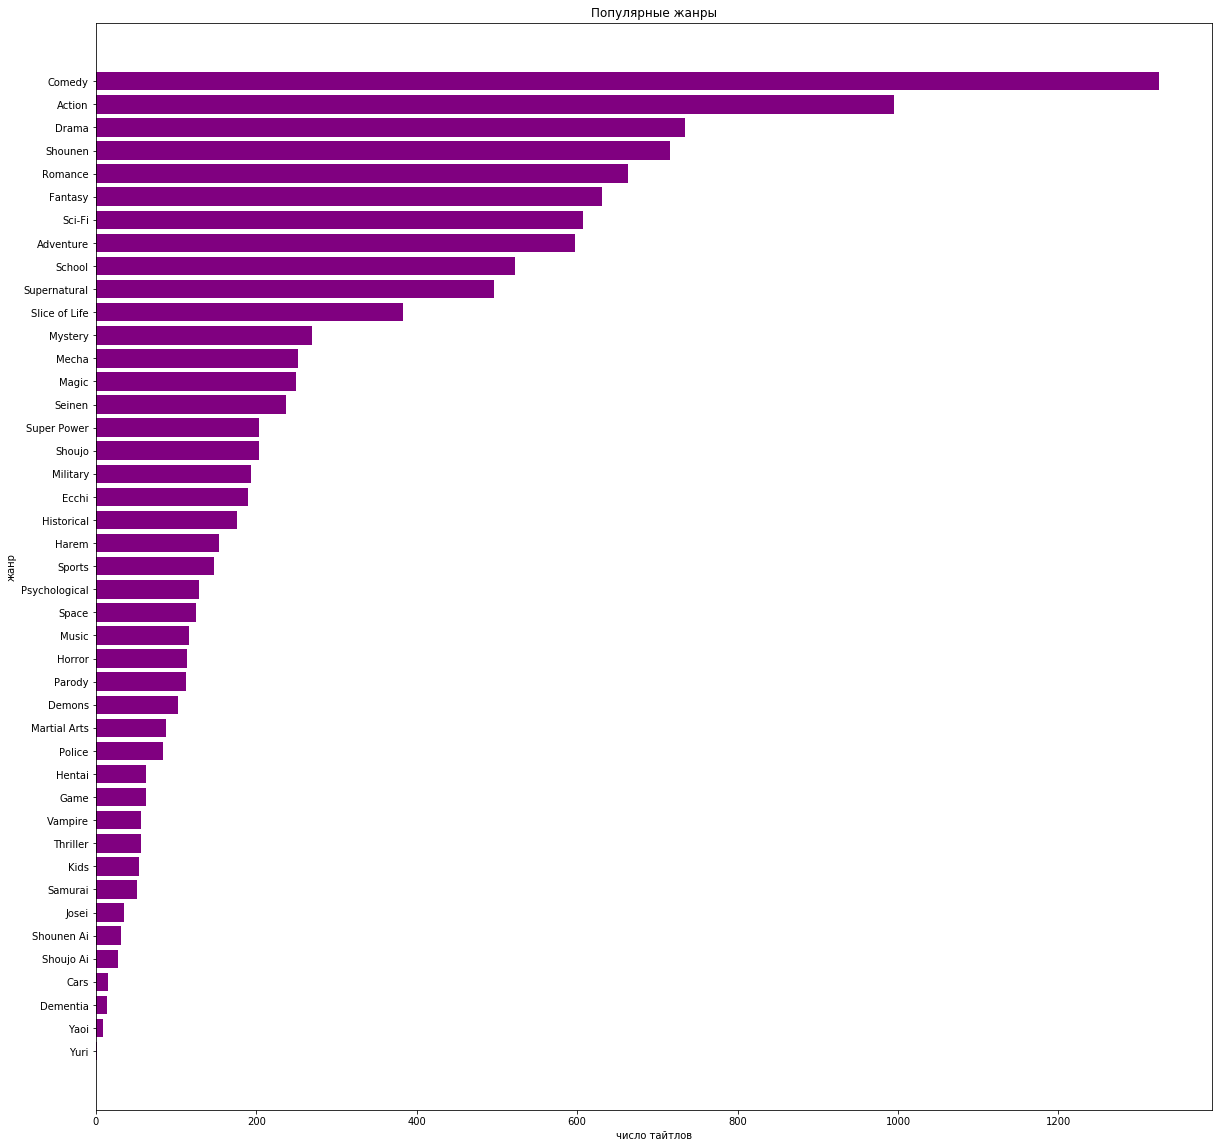

In [63]:
genre = genre_finder(an['genre'])
plt.figure(figsize = (20, 20))
plt.barh(y = list(genre.keys()), width = list(genre.values()), color = 'purple')
plt.ylabel('жанр')
plt.xlabel('число тайтлов')
plt.title('Популярные жанры')
plt.show()

А теперь немного сойдём с ума и напишем функцию, которая принимает на вход таблицу и тип аниме, а возвращает общее количество тайтлов данного типа, а также рекомендует один случайный из них.

In [240]:
def type_title(df, types):
    df1 = an[['name', 'type']]
    dict1 = dict(zip(list(df1['name']), list(df1['type'])))
    mov = []
    tv = []
    ova = []
    special = []
    mus = []
    ona = []
    for key, value in dict1.items():
        if value == 'Movie':
            mov.append(key)
        elif value == 'TV':
            tv.append(key)
        elif value == 'OVA':
            ova.append(key)
        elif value == 'Special':
            special.append(key)
        elif value == 'Music':
            mus.append(key)
        elif value == 'ONA':
            ona.append(key)
    if types == 'Movie':
        return len(mov), random.choice(mov)
    elif types == 'TV':
        return len(tv), random.choice(tv)
    elif types == 'OVA':
        return len(ova), random.choice(ova)
    elif types == 'Special':
        return len(special), random.choice(special)
    elif types == 'Music':
        return len(mus), random.choice(mus)
    elif types == 'ONA':
        return len(ona), random.choice(ona)
            
            
            
            
            

In [264]:
type_title(an, 'Movie')

(447, 'Mononoke Hime')

Похоже, чего-то в нашей таблице всё-таки не хватает. У нас есть названия, рейтинг, количество просмотревших, тип, но никакой информации о том, что из себя представляет тот или иной тайтл. С этим что-то надо делать.
Используем библиотеку wikipedia и вытащим адреса страниц, связанных с нашими картинами. После этого добавим их в общую таблицу an. 

Не стоит забывать, что для нашего тайтла может не найтись родственной души в Википедии, поэтому используем обработку исключений.

In [88]:
def wiki_knowledge(names):
    n = []
    for name in names:
        try:
            p = wikipedia.page(name)
            n.append(p.url)
        except:
            p = wikipedia.exceptions.PageError(name)
            n.append(p)
    return n
        
    
    

In [89]:
wiki_knowledge(an['name'])

C:\Users\feygi\Anaconda3\lib\site-packages\wikipedia\wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file C:\Users\feygi\Anaconda3\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')
C:\Users\feygi\Anaconda3\lib\site-packages\wikipedia\wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The

C:\Users\feygi\Anaconda3\lib\site-packages\wikipedia\wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file C:\Users\feygi\Anaconda3\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')
C:\Users\feygi\Anaconda3\lib\site-packages\wikipedia\wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The

C:\Users\feygi\Anaconda3\lib\site-packages\wikipedia\wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file C:\Users\feygi\Anaconda3\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')
C:\Users\feygi\Anaconda3\lib\site-packages\wikipedia\wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The

C:\Users\feygi\Anaconda3\lib\site-packages\wikipedia\wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file C:\Users\feygi\Anaconda3\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')
C:\Users\feygi\Anaconda3\lib\site-packages\wikipedia\wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The

['https://en.wikipedia.org/wiki/Your_Name',
 'https://en.wikipedia.org/wiki/Fullmetal_Alchemist:_Brotherhood',
 'https://en.wikipedia.org/wiki/Gin_Tama',
 'https://en.wikipedia.org/wiki/Steins;Gate',
 'https://en.wikipedia.org/wiki/List_of_Gin_Tama_chapters',
 wikipedia.exceptions.PageError('Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou'),
 'https://en.wikipedia.org/wiki/Hunter_%C3%97_Hunter',
 'https://en.wikipedia.org/wiki/Legend_of_the_Galactic_Heroes',
 wikipedia.exceptions.PageError('Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare'),
 wikipedia.exceptions.PageError('Gintama&#039;: Enchousen'),
 'https://en.wikipedia.org/wiki/Clannad_(visual_novel)',
 'https://en.wikipedia.org/wiki/A_Silent_Voice_(manga)',
 'https://en.wikipedia.org/wiki/Gin_Tama',
 'https://en.wikipedia.org/wiki/Code_Geass',
 'https://en.wikipedia.org/wiki/Haikyu!!',
 'https://en.wikipedia.org/wiki/Spirited_Away',
 'https://en.wikipedia.org/wiki/Your_Lie_in_April',
 'https://en.wikipedia.org/wiki/M

In [93]:
title = wiki_knowledge(an['name'])
an = an.assign(t = title)
an

C:\Users\feygi\Anaconda3\lib\site-packages\wikipedia\wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file C:\Users\feygi\Anaconda3\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')
C:\Users\feygi\Anaconda3\lib\site-packages\wikipedia\wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The

C:\Users\feygi\Anaconda3\lib\site-packages\wikipedia\wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file C:\Users\feygi\Anaconda3\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')
C:\Users\feygi\Anaconda3\lib\site-packages\wikipedia\wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The

C:\Users\feygi\Anaconda3\lib\site-packages\wikipedia\wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file C:\Users\feygi\Anaconda3\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')
C:\Users\feygi\Anaconda3\lib\site-packages\wikipedia\wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The

C:\Users\feygi\Anaconda3\lib\site-packages\wikipedia\wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file C:\Users\feygi\Anaconda3\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')
C:\Users\feygi\Anaconda3\lib\site-packages\wikipedia\wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The

,anime_id,name,genre,type,episodes,rating,members,t
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,https://en.wikipedia.org/wiki/Your_Name
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,https://en.wikipedia.org/wiki/Fullmetal_Alchem...
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,https://en.wikipedia.org/wiki/Gin_Tama
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,https://en.wikipedia.org/wiki/Steins;Gate
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,https://en.wikipedia.org/wiki/List_of_Gin_Tama...
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351,"Page id ""Haikyuu!!: Karasuno Koukou VS Shirato..."
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855,https://en.wikipedia.org/wiki/Hunter_%C3%97_Hu...
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679,https://en.wikipedia.org/wiki/Legend_of_the_Ga...
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534,"Page id ""Gintama Movie: Kanketsu-hen - Yorozuy..."
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109,"Page id ""Gintama&#039;: Enchousen"" does not ma..."


# Этап 3. Выходя за рамки таблицы

А ещё из Википедии можно вытащить ссылки на картинки с каждой из страниц. Воспользуемся веб-скреппингом.

In [118]:
def images_from_links(links):
    spisall = []
    spisall2 = []
    for i in links:
        try:
            req = requests.get(i)
            beau = BeautifulSoup(req.text, features = 'xml')
            a = beau.find_all('a', class_ = 'image')
            spis_of_images = []
            for link in a:
                s = link['href']
                spis_of_images.append(s)
                spisall.extend(spis_of_images)
        except:
            spis_of_images.append('NaN')
            spisall.extend(spis_of_images)
    for each in spisall:
        pic = 'https://en.wikipedia.org' + each
        spisall2.append(pic)
    return spisall2

In [119]:
images_from_links(title)

['https://en.wikipedia.org/wiki/File:Your_Name_poster.png',
 'https://en.wikipedia.org/wiki/File:Your_Name_poster.png',
 'https://en.wikipedia.org/wiki/File:Suga_Shrine_stairs_high-angle_20161113-070754.jpg',
 'https://en.wikipedia.org/wiki/File:Your_Name_poster.png',
 'https://en.wikipedia.org/wiki/File:Suga_Shrine_stairs_high-angle_20161113-070754.jpg',
 'https://en.wikipedia.org/wiki/File:Shinanomachi_eki-mae_footbridge_20161107-155952.jpg',
 'https://en.wikipedia.org/wiki/File:Your_Name_poster.png',
 'https://en.wikipedia.org/wiki/File:Suga_Shrine_stairs_high-angle_20161113-070754.jpg',
 'https://en.wikipedia.org/wiki/File:Shinanomachi_eki-mae_footbridge_20161107-155952.jpg',
 'https://en.wikipedia.org/wiki/File:Yotsuya-Sta-Akasaka.JPG',
 'https://en.wikipedia.org/wiki/File:Your_Name_poster.png',
 'https://en.wikipedia.org/wiki/File:Suga_Shrine_stairs_high-angle_20161113-070754.jpg',
 'https://en.wikipedia.org/wiki/File:Shinanomachi_eki-mae_footbridge_20161107-155952.jpg',
 'https:

Естественно, таблица с myanimelist.net и Википедия - не единственные источники данных по аниме. Есть и многие другие, а некоторые из этих других даже имеют официальный API на своих сайтах!

Напишем функцию, которая будет давать нам основную информацию по тайтлу, представленному на сайте themoviedb.org. На вход она будет принимать тип картины и её название на английском языке. На выходе получим таблицу с данными по рейтингу, популярности, а также описание.

In [120]:
def find_anime(typeofanime, name):
    url = 'https://api.themoviedb.org/3/search/' + typeofanime + '?api_key=e27a8b9deeeb411180bb3b440fe3592e&query=' + name + '&page=1&include_adult=true'
    info = requests.get(url)
    js_info = info.json()
    try:
        found =  js_info['results'][0]
        pre_table = pd.DataFrame([found['name'], found['vote_average'], found['popularity'], found['overview']], index = ['название', 'средний балл', 'популярность', 'описание'], columns = ['базовая информация'])
        return pre_table
    except IndexError:
        return 'NaN'
        

In [266]:
find_anime('tv', 'Death Parade')

,базовая информация
название,Death Parade
средний балл,7.91
популярность,35.977
описание,There is a place after death that’s neither he...


# Этап 4. Сохраним таблицу в новый файл

In [268]:
an.to_excel('anime_table.xlsx', sheet_name='sheet1', index=False)